# Gradient Descent for $y=x^2$

<div class="alert alert-block alert-success">
<b>Goals:</b> 

* A demo notebook to showcase several technical aspects of gradient descent.
</div>

<div class="alert alert-block alert-info">
<b>Content:</b> In this short notebook, we try gradient descent for $y=x^2$. We hardcode the derivative and the gradient descent step.
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Lets create and plot the function itself.

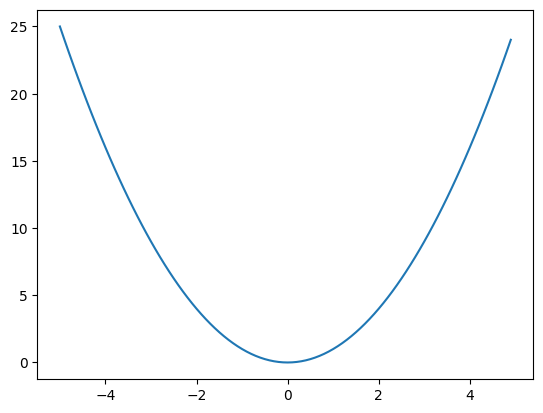

In [2]:
x=np.arange(-5,5,0.1)
y=x**2
plt.plot(x,y)

In [3]:
def gradient_descent_step(x, alpha):
    '''
    for the function y=x**2,
    take one step into the direction of the negative gradient using 
    * stepsize alpha
    * x = current coord to start from.
    Since the function takes only one variabe, the gradient consists of just one element. 
    The negative derivative of the function is 
    -2*x (derivative evaluated at current coord x).
    alpha = learning rate (step size)
    '''
    return x-2*x*alpha

In [15]:
def compute_and_plot_gradient_descent(start_x, alpha, inttype='int32'):
    '''
    plot the function y=x**2 (hard coded)
    start a gradient decent at start_x
    run gradient descent for 10 steps and plot the resulting points that are reached
    start_x = the argument from where we start gradient descent
    alpha = the learning rate
    '''
    # Run gradient descent and record the resulting x coords
    x=start_x
    x_steps=[x]
    # run gradient descent and print steps
    for i in range(10):
        x=gradient_descent_step(x, alpha)
        x_steps.append(x)
        print (x)
    # plot function and resulting gradient descent path
    xs=np.arange(-5,5,0.1)
    ys=xs**2
    x_steps=np.array(x_steps)
    # x_steps = x_steps.astype(inttype)
    #print(type(x_steps[9]))
    y_steps=x_steps**2
    plt.plot(xs,ys)
    plt.plot(x_steps, y_steps)
    plt.plot(x_steps, y_steps, 'ro')

## Let's Test Different Learning Rates

-2.0
1.3333333333333335
-0.8888888888888893
0.592592592592593
-0.39506172839506204
0.26337448559670806
-0.1755829903978054
0.11705532693187026
-0.07803688462124686
0.05202458974749791


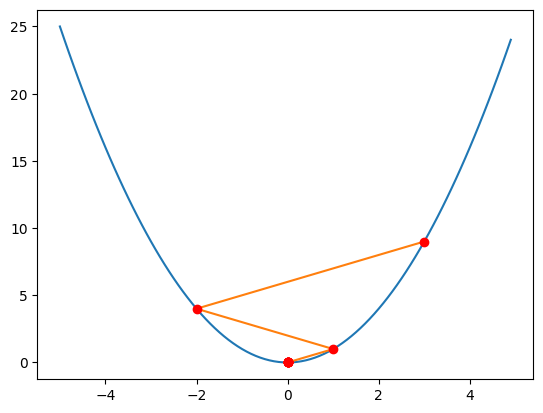

In [16]:
compute_and_plot_gradient_descent(3, 5/6)

Results: Gradient descent zeroes in on the actual minimum, zig-zagging around it.

2.0
1.3333333333333335
0.8888888888888891
0.5925925925925928
0.3950617283950619
0.26337448559670795
0.1755829903978053
0.11705532693187021
0.0780368846212468
0.05202458974749787


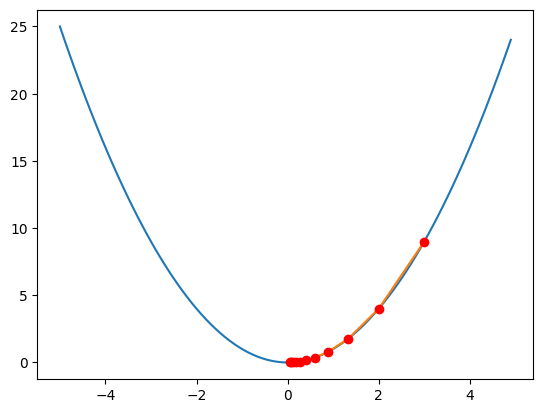

In [14]:
compute_and_plot_gradient_descent(3, 1/6)

Result: Very smooth convergence towards the minimum.

-3
3
-3
3
-3
3
-3
3
-3
3


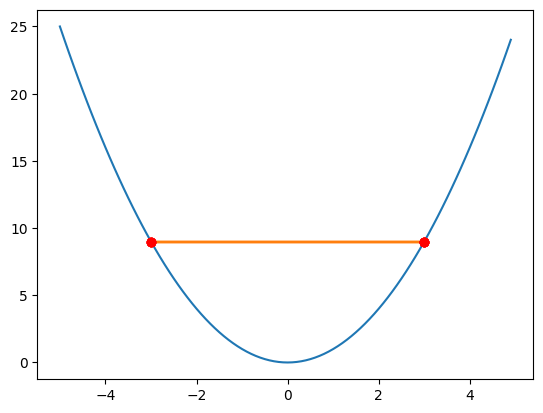

In [17]:
compute_and_plot_gradient_descent(3, 1)

Result: No convergence, alternating between 3 and -3.

-3.6000000000000005
4.320000000000001
-5.184000000000002
6.220800000000003
-7.464960000000006
8.95795200000001
-10.749542400000013
12.899450880000018
-15.479341056000024
18.57520926720003


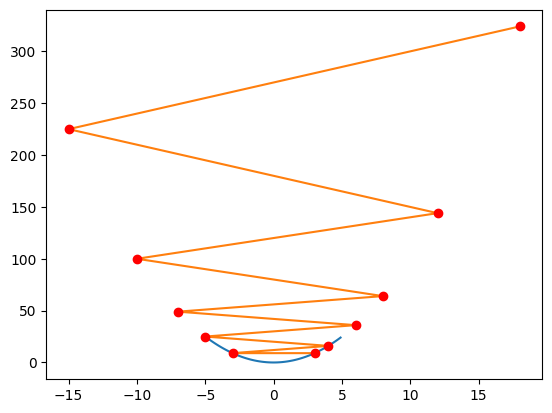

In [18]:
compute_and_plot_gradient_descent(3, 1.1)

Result: No convergence, instead of descending towards the minimum, function path explodes...

-9
27
-81
243
-729
2187
-6561
19683
-59049
177147


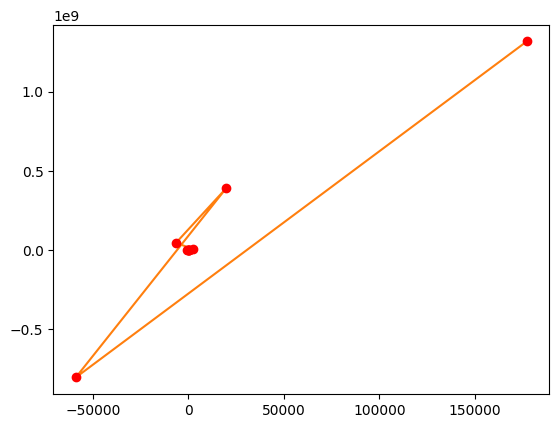

In [19]:
compute_and_plot_gradient_descent(3, 2)

Result: The gradient descent path does not only explode, it even takes negative values. What happened here?

Explanation: We see with this little toy example the importance of choosing good data types. In this case, in the last example, the y-values max out the range of int32 -- set explicitly in the function above. Thus choosing int32 will yield a broken diagram with negative values of a quadratic function. This can be resolved using int64 as data type (dtype). 
This is something that must be kept in mind when designing data for neural networks (range and precision must fit the respective model and learning process).

__WARNING__: Different operating systems choose different default int types (32 or 64). Thus expect different results on different machines, or -- better -- fix the datatype explicitly!

1) Try larger data type int64

-9
27
-81
243
-729
2187
-6561
19683
-59049
177147


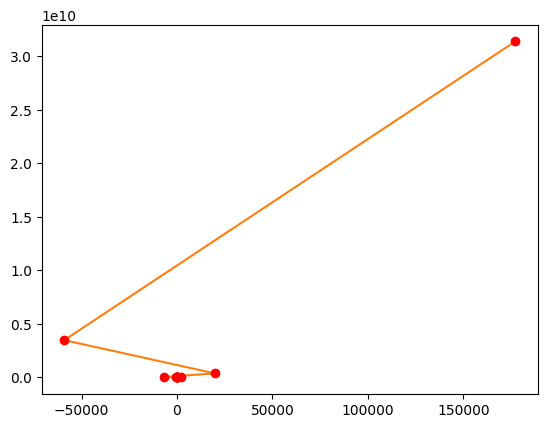

In [22]:
compute_and_plot_gradient_descent(3, 2, inttype='int64')

Result: Setting the integer type yields (as expected) the exploding gradient situation.

2) Try larger datatype but also larger learning rate

-117
4563
-177957
6940323
-270672597
10556231283
-411693020037
16056027781443
-626185083476277
24421218255574803


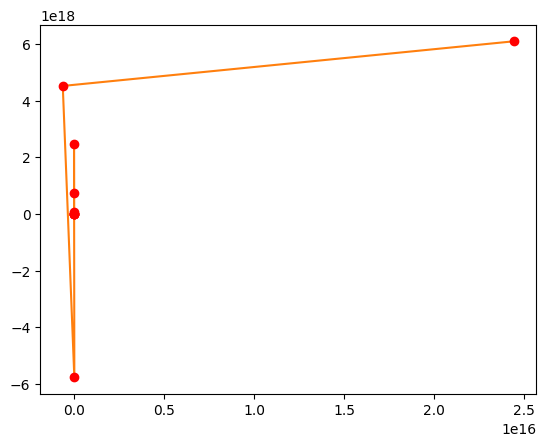

In [23]:
compute_and_plot_gradient_descent(3, 20, inttype='int64')

Result: Setting the learning rate higher, we also outmax the larger integer datatype...

3) Do not set data type explicitly and use the default data type of your OS

Modify compute_and_plot_gradient_descent by switching the commenting of the lines

```
# x_steps = x_steps.astype(inttype)
print(type(x_steps[9]))
```
Run the function again. Compare the results with those of your neighbors.

<div class="alert alert-block alert-info">
<b>Take-Aways:</b> 
    
* take care of data types (ranges, memory consumption)!
* take care of OS specifics (relevant for reproducible experiments)
* gradient descent is very useful
* gradient descent relies on the derivative (here we hard-coded it, how to handle that generally?) 
* gradient descent must be monitored and controlled carefully!
</div>

<div class="alert alert-block alert-success">
<b>Play with:</b> 
    
* different functions
* different starting values
* different step sizes
* different data types
</div>